In [ ]:
for i in range(21):
    raw = pd.read_csv(r'C:\Users\com\[MSB535]\data\Breau Data\{}\{}.csv'.format(2000+i,2000+i))
    raw['YEAR'] = 2000+i
    raw = raw.drop([raw.columns[7]], axis = 1)
    if i == 0 :
        data = raw
    else:
        data = pd.concat([data,raw]) 
data.to_csv(r'C:\Users\com\[MSB535]\data\Breau Data\Data.csv')

In [2]:
url = "https://www.investing.com/instruments/HistoricalDataAjax"
head = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest'
}
payload = {
    'curr_id': '349',
'header': 'LHAG Historical Data',
'st_date': '01/01/2011',
'end_date': '12/31/2019',
'interval_sec': 'Monthly',
'sort_col': 'date',
'sort_ord': 'DESC',
'action': 'historical_data',
}
result = requests.post(url, headers = head, data = payload)
result.status_code
temp = BeautifulSoup(result.text)
stockdata = pd.read_html(str(temp.find('table')))[0]
for i in range(len(stockdata['Date'])):
    if stockdata['Date'][i].split()[0] == 'Jan':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 01. 25.'
    elif stockdata['Date'][i].split()[0] == 'Feb':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 02. 25.'
    elif stockdata['Date'][i].split()[0] == 'Mar':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 03. 25.'
    elif stockdata['Date'][i].split()[0] == 'Apr':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 04. 25.'
    elif stockdata['Date'][i].split()[0] == 'May':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 05. 25.'
    elif stockdata['Date'][i].split()[0] == 'Jun':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 06. 25.'
    elif stockdata['Date'][i].split()[0] == 'Jul':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 07. 25.'
    elif stockdata['Date'][i].split()[0] == 'Aug':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 08. 25.'
    elif stockdata['Date'][i].split()[0] == 'Sep':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 09. 25.'
    elif stockdata['Date'][i].split()[0] == 'Oct':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 10. 25.'
    elif stockdata['Date'][i].split()[0] == 'Nov':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 11. 25.'
    elif stockdata['Date'][i].split()[0] == 'Dec':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 12. 25.'
stockdata.to_excel(excel_writer=r'C:\Users\com\[MSB535]\data\Breau Data\stock_luft.xlsx')

C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import traceback
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data =pd.read_csv(r'C:\Users\com\[MSB535]\data\Breau Data\Data.csv')

In [4]:
company_name = []
for keys in data['UNIQUE_CARRIER_NAME']:
    if keys in company_name :
        continue
    else :
        company_name.append(keys)            

In [5]:
company_name

['Asia Pacific',
 'Varig S. A.',
 'Qantas Airways Ltd.',
 'Cargolux Airlines International S.A',
 'United Air Lines Inc.',
 'ExpressJet Airlines Inc.',
 'Tatonduk Outfitters Limited d/b/a Everts Air Alaska and Everts Air Cargo',
 'Polar Air Cargo Airways',
 'Martinair Holland N.V.',
 'El Al Israel Airlines Ltd.',
 'Northwest Airlines Inc.',
 'Federal Express Corporation',
 'United Parcel Service',
 'Kitty Hawk International',
 'Nippon Cargo Airlines',
 'Japan Air Lines Co. Ltd.',
 'Korean Air Lines Co. Ltd.',
 'Amerijet International',
 'Sterling Cargo',
 'Evergreen International Inc.',
 'Compagnie Natl Air France',
 'Compagnia Aerea Italiana',
 'Lufthansa German Airlines',
 'Arrow Air Inc.',
 'China Airlines Ltd.',
 'Eva Airways Corporation',
 'Reliant Airlines',
 'Pace Airlines',
 'North American Airlines',
 'Sky Trek International Airlines',
 'Falcon Air Express',
 'Capital Cargo International',
 'Express One International Inc.',
 'Astar USA, LLC',
 'Air Transport International',
 '

In [8]:
for lines in company_name:
    if 'Lufthansa' in lines:
        print(lines)

Lufthansa German Airlines


TypeError: argument of type 'float' is not iterable

In [9]:
company = 'Lufthansa German Airlines'
savename= 'Deltaair'

In [10]:
info = []
threeones = ['1','3','5','7','8','10','12']
thirtys = ['4','6','9','11']
twoeights = ['2']
year = 2000
month = 1
is_company = data['UNIQUE_CARRIER_NAME'] == company
for i in range(21):
    month = 1
    for j in range(12):
        is_month = data['MONTH'] == month
        is_year = data['YEAR'] == year
        classifier = is_company & is_month & is_year
        passengers = data[classifier]['PASSENGERS'].sum()
        freight = data[classifier]['FREIGHT'].sum() + data[classifier]['MAIL'].sum()
        if str(month) in twoeights:
            date = str(year)+'. 0'+str(month)+'. 25.'
        elif str(month) in thirtys:
            if len(str(month)) == 1:
                date = str(year)+'. 0'+str(month)+'. 25.'
            else:
                date = str(year)+'. '+str(month)+'. 25.'
        elif str(month) in threeones:
            if len(str(month)) == 1:
                date = str(year)+'. 0'+str(month)+'. 25.'
            else:
                date = str(year)+'. '+str(month)+'. 25.'
        info.append([company, year, month, date, passengers, freight])
        month += 1
    year += 1
temp = pd.DataFrame(info,columns = ['Company','Year','Month','Date','Passenger','Freight'])
table = temp[temp['Passenger']!=0]
globals()['table_{}'.format(savename)]=table

In [11]:
stockdata =pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\stock_luft.xlsx')

In [12]:
year = 20
while True:
    if year == 0:
        break
    count = 0
    for i in range(len(stockdata['Date'])):
        if stockdata['Date'][i].split()[0].rstrip('.')[2:4].lstrip('0') == str(year):
            count +=1
    if count < 12:
        print('Year of ' + str(year)+' has lower month by '+str(count))
    year = year-1

Year of 20 has lower month by 0
Year of 10 has lower month by 0
Year of 9 has lower month by 0
Year of 8 has lower month by 0
Year of 7 has lower month by 0
Year of 6 has lower month by 0
Year of 5 has lower month by 0
Year of 4 has lower month by 0
Year of 3 has lower month by 0
Year of 2 has lower month by 0
Year of 1 has lower month by 0


In [13]:
floated = []
for i in range(len(stockdata['Change %'])):
    floated.append(float(stockdata['Change %'].values[i].rstrip('%')))
stockdata['Change(float)'] = floated

In [14]:
newdate = []
for i in range(len(table_Deltaair['Date'])):
    date = ''
    for j in range(3):
        if j == 2:
            date += table_Deltaair['Date'].values[i].split()[j].strip().rstrip('.')
        else:
            date += table_Deltaair['Date'].values[i].split()[j].strip().rstrip('.')+'-'
    newdate.append(date)
table_Deltaair['newdate'] = newdate
temp = table_Deltaair[table_Deltaair['Year']<2020]
table_Deltaair = temp

C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [15]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100,colors = 'color'):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color=colors)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(np.arange(0,len(x),step = 30),x[np.arange(0,len(x),step = 30)])
    plt.show()

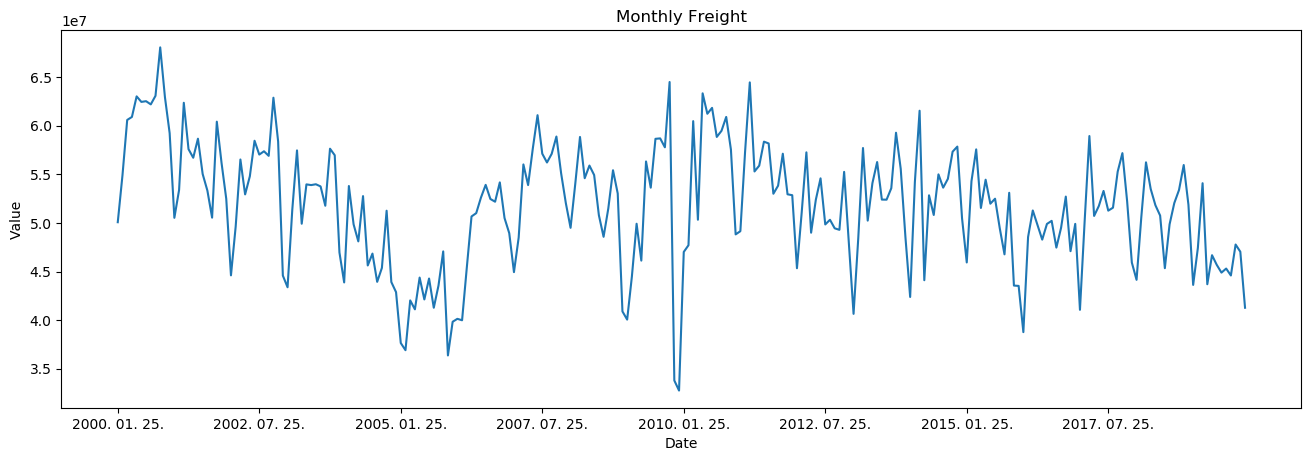

In [16]:
what = 'Freight'
ts_Deltaair = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['Date'],columns = [what])
plot_df(ts_Deltaair, x=ts_Deltaair.index, y=ts_Deltaair[what].values, title='Monthly {}'.format(what), colors = 'tab:Blue')

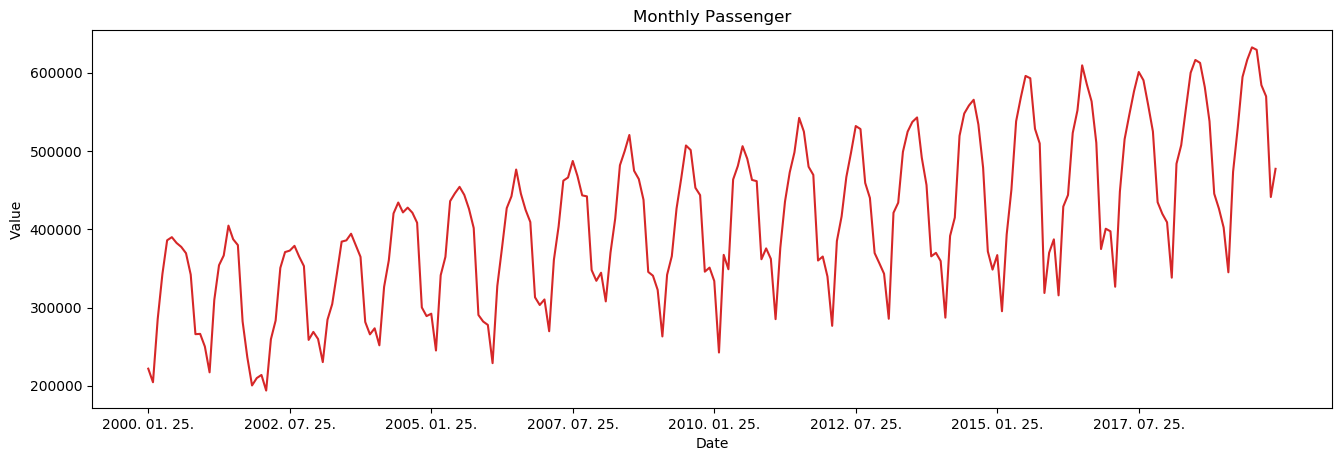

In [17]:
what = 'Passenger'
ts_Deltaair = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['Date'],columns = [what])
plot_df(ts_Deltaair, x=ts_Deltaair.index, y=ts_Deltaair[what].values, title='Monthly {}'.format(what), colors = 'tab:red')

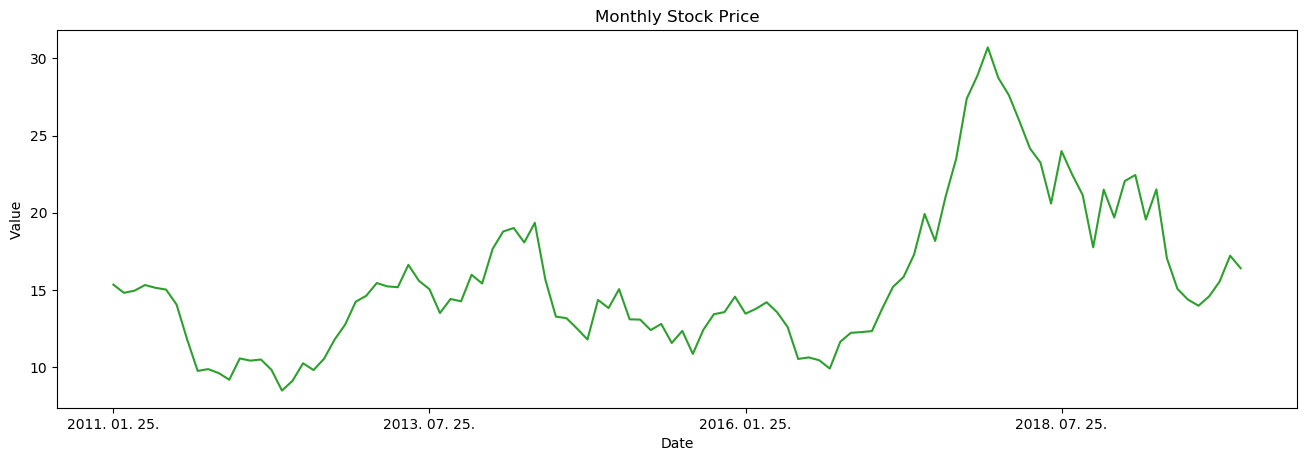

In [18]:
what = 'Price'
#Price or Change(float'
stock_Deltaair = pd.DataFrame(stockdata.loc[::-1][what].values,index = stockdata.loc[::-1]['Date'],columns = [what])
plot_df(stock_Deltaair, x=stock_Deltaair.index, y=stock_Deltaair[what].values, title='Monthly Stock Price',colors = 'tab:Green')

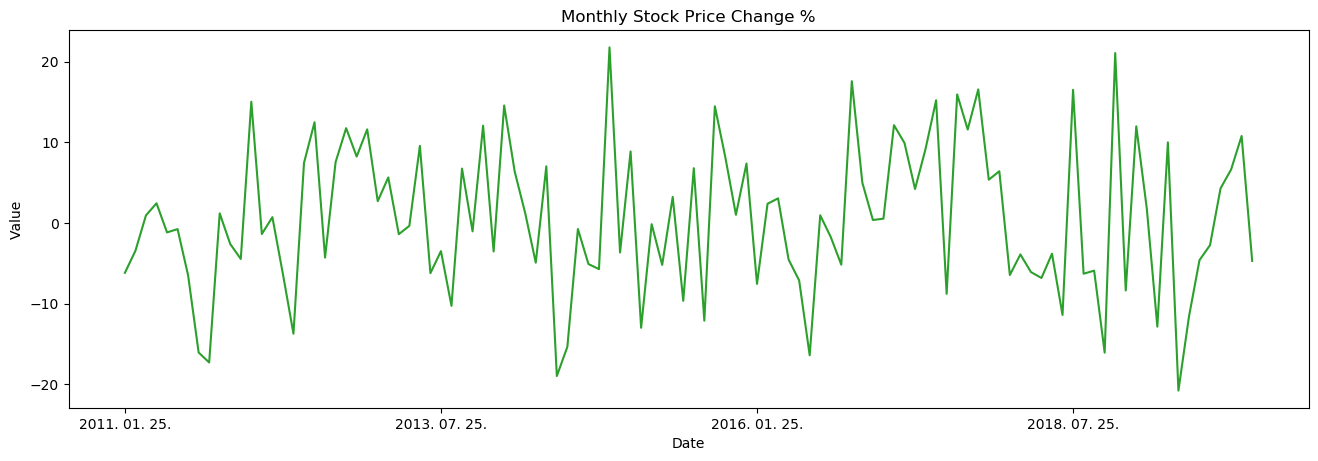

In [20]:
what = 'Change(float)'
#Price or Change(float)'
stock_Deltaair = pd.DataFrame(stockdata.loc[::-1][what].values,index = stockdata.loc[::-1]['Date'],columns = [what])
plot_df(stock_Deltaair, x=stock_Deltaair.index, y=stock_Deltaair[what].values, title='Monthly Stock Price Change %',colors = 'tab:Green')

In [21]:
import statsmodels.api as sm
from datetime import datetime
from pylab import rcParams

In [22]:
datetime = []
for i in range(len(table_Deltaair['newdate'])):
    datetime.append(pd.to_datetime(table_Deltaair['newdate'].values[i], format='%Y-%m-%d'))
table_Deltaair['datetime'] = datetime

C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


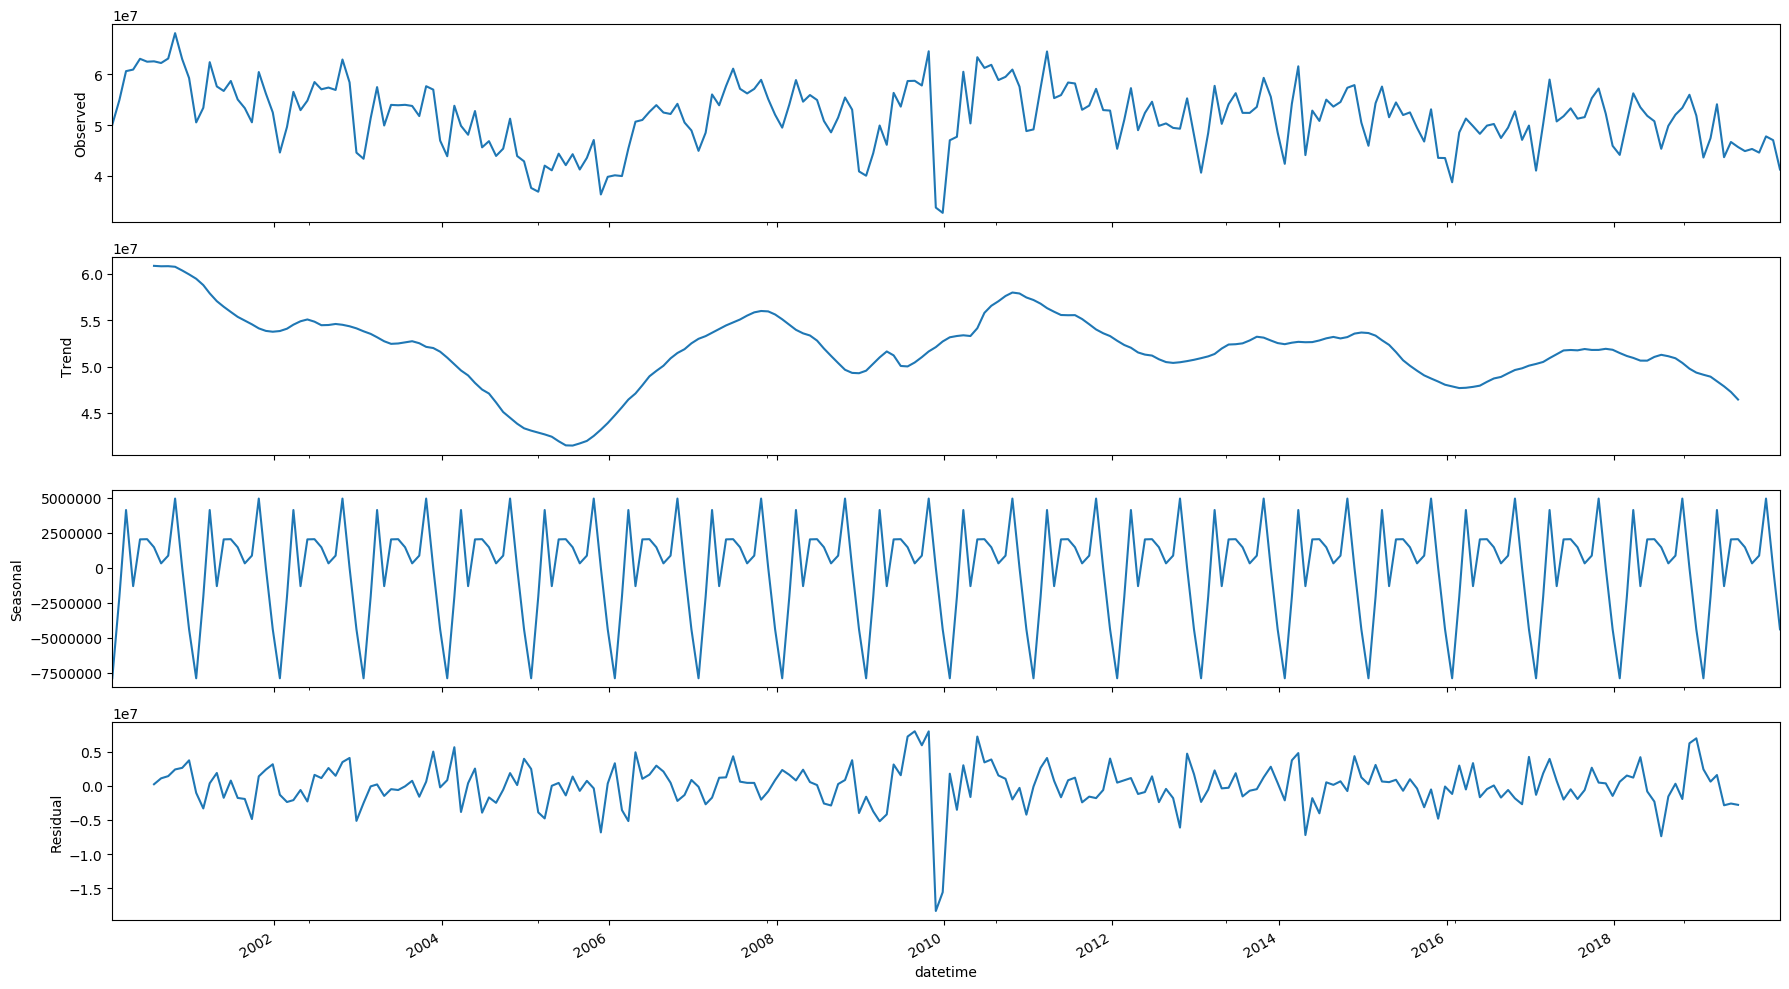

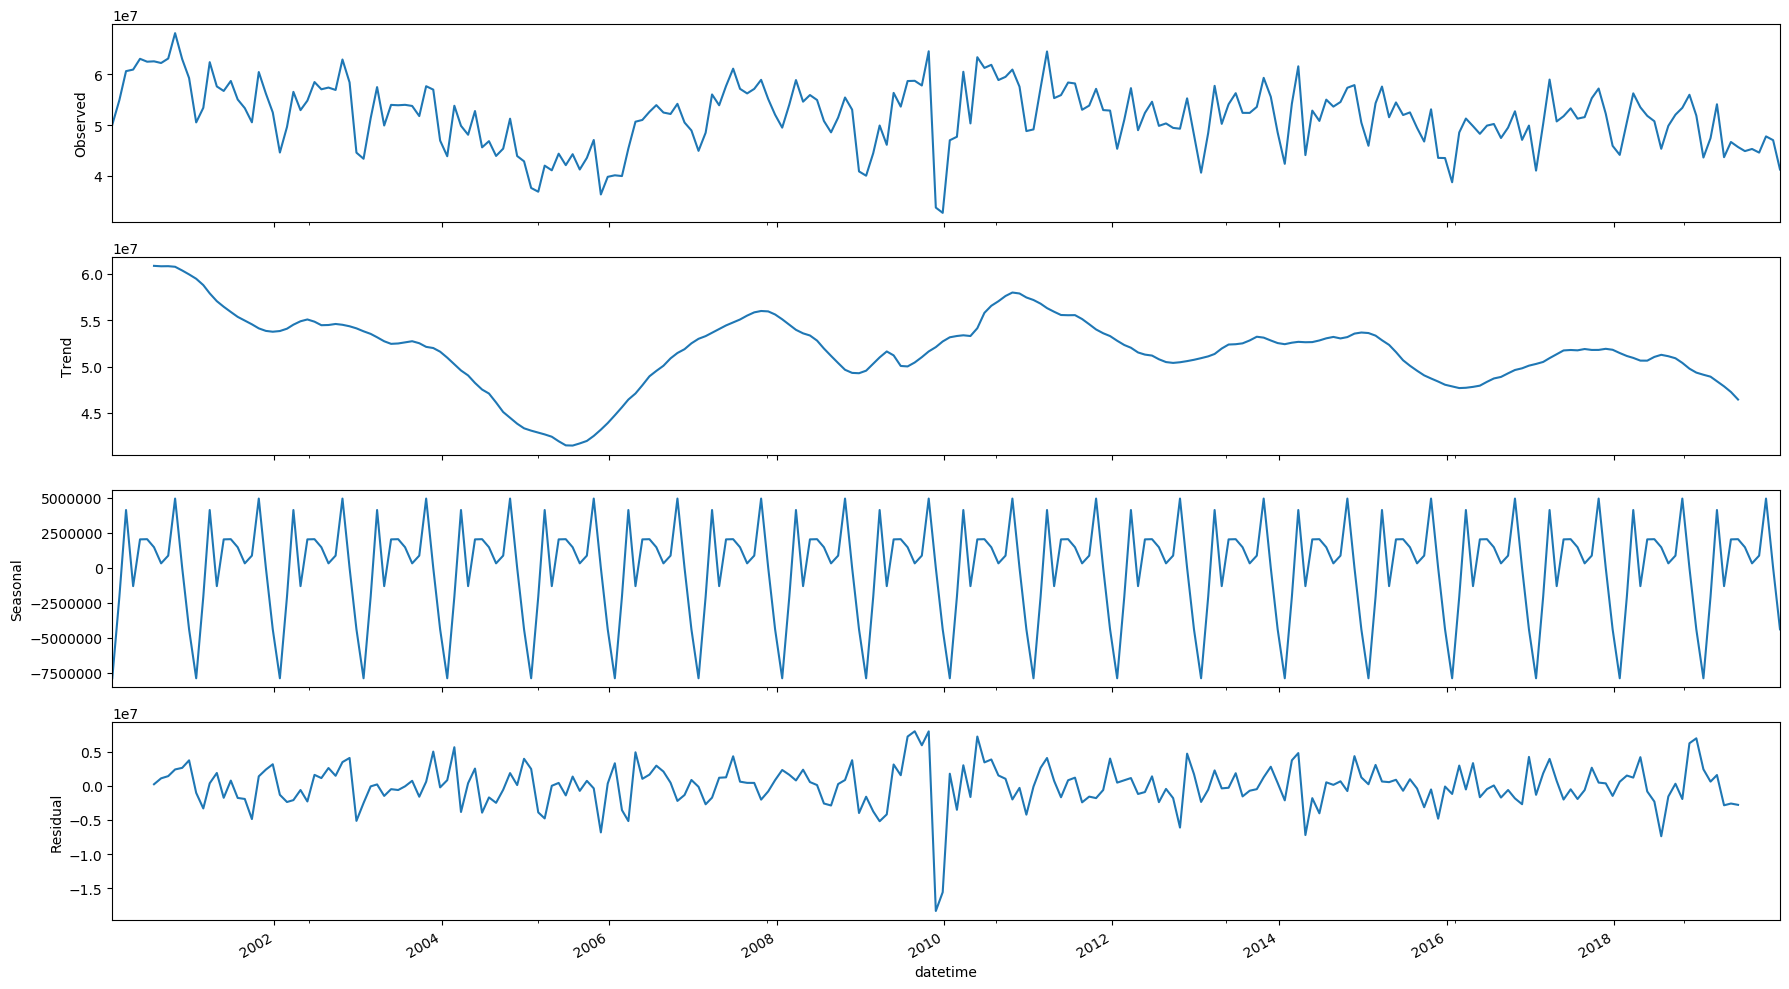

In [23]:
what = 'Freight'
temp = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['datetime'],columns = [what])
ts_Deltaair = temp[temp[what] !=0]
rcParams['figure.figsize'] = 18, 10
rcParams['figure.dpi'] = 100
decomposition = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12)
decomposition.plot()

In [24]:
temp = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12).trend
table_trend = temp[temp[what].notnull()]
newdate = []
for i in range(len(stockdata['Date'])):
    date = ''
    for j in range(len(stockdata['Date'][i].split())):
        if j == 2:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')
        else:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')+'-'
    newdate.append(date)
stockdata['newdate'] = newdate
datetime = []
for i in range(len(stockdata['Date'])):
    datetime.append(pd.to_datetime(stockdata['newdate'][i], format='%Y-%m-%d'))
stockdata['datetime'] = datetime
stockdata.head()
price = []
date = []
for i in range(len(table_trend)):
    if stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].size != 0:
        price.append(stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].values)          
        date.append(table_trend.index[i])
chart_info = pd.DataFrame(price, index = date, columns = ['Price'])
chart_info[what] = table_trend[what]
chart_info.to_excel(excel_writer=r'C:\Users\com\[MSB535]\data\Breau Data\{} {}.xlsx'.format(company,what))

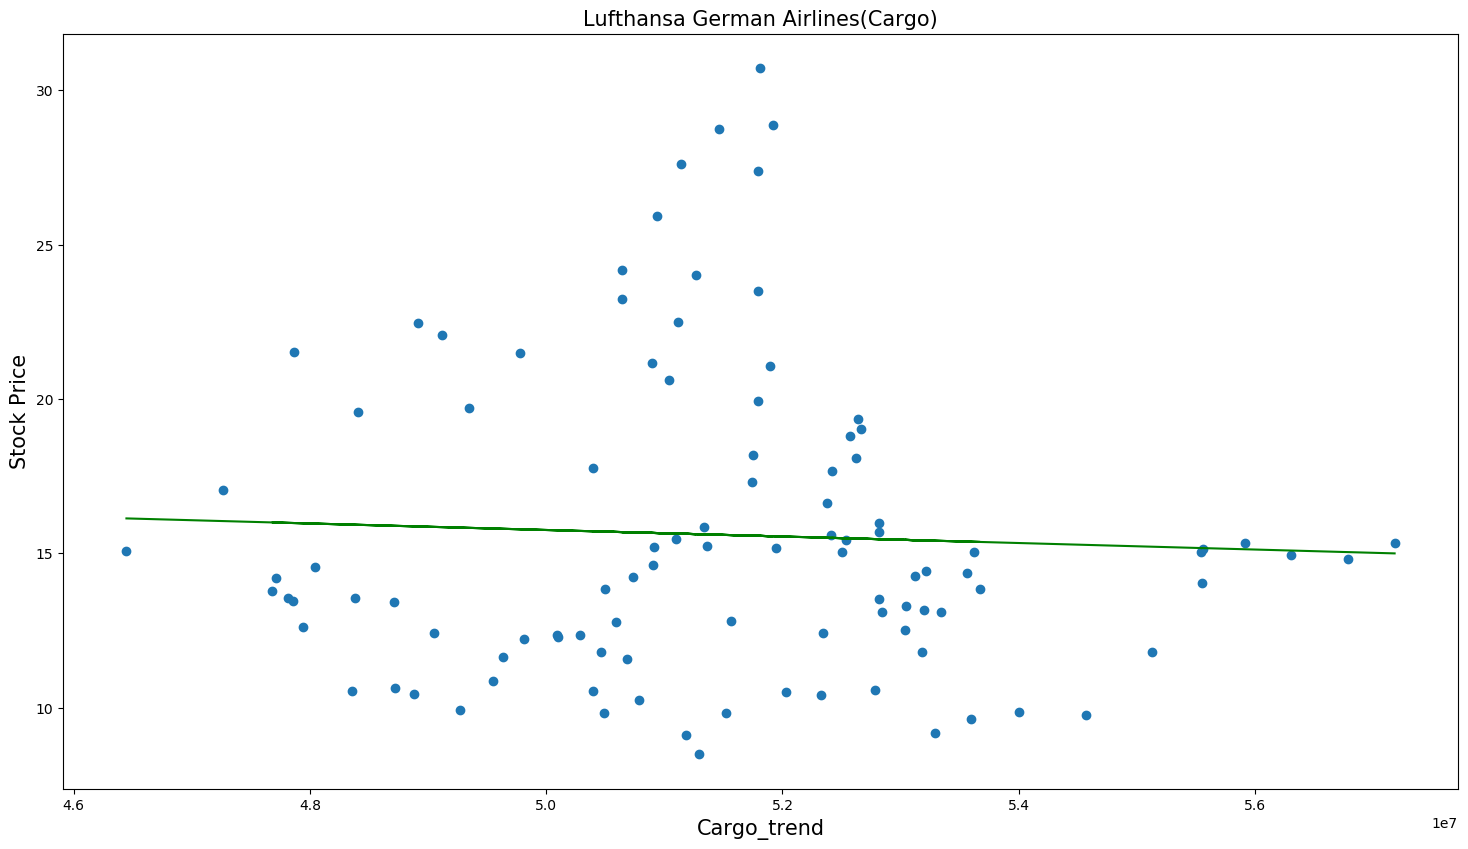

In [25]:
line = LinearRegression()
y_value = chart_info['Price']
x_value = chart_info[what].values
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('{}(Cargo)'.format(company), fontsize = 15)
plt.xlabel('Cargo_trend', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [26]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2226
Date:                Mon, 21 Dec 2020   Prob (F-statistic):              0.638
Time:                        14:15:40   Log-Likelihood:                -306.81
No. Observations:                 102   AIC:                             617.6
Df Residuals:                     100   BIC:                             622.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.0323     11.522      1.825      0.071      -1.827      43.891
x1         -1.056e-07   2.24e-07     -0.472      0.638    -5.5e-07    3.38e-07
==============================================================================
Omnibus:                       17.942   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.069
Skew:                           1.061   Prob(JB):                     2.66e-05
Kurtosis:                       3.675   Cond. No.                     1.21e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
dt_min = table_Deltaair['Date'] >= stockdata.tail(1)['Date'].values[0]
dt_max = table_Deltaair['Date'] <= stockdata.head(1)['Date'].values[0]
dt_between = dt_min & dt_max

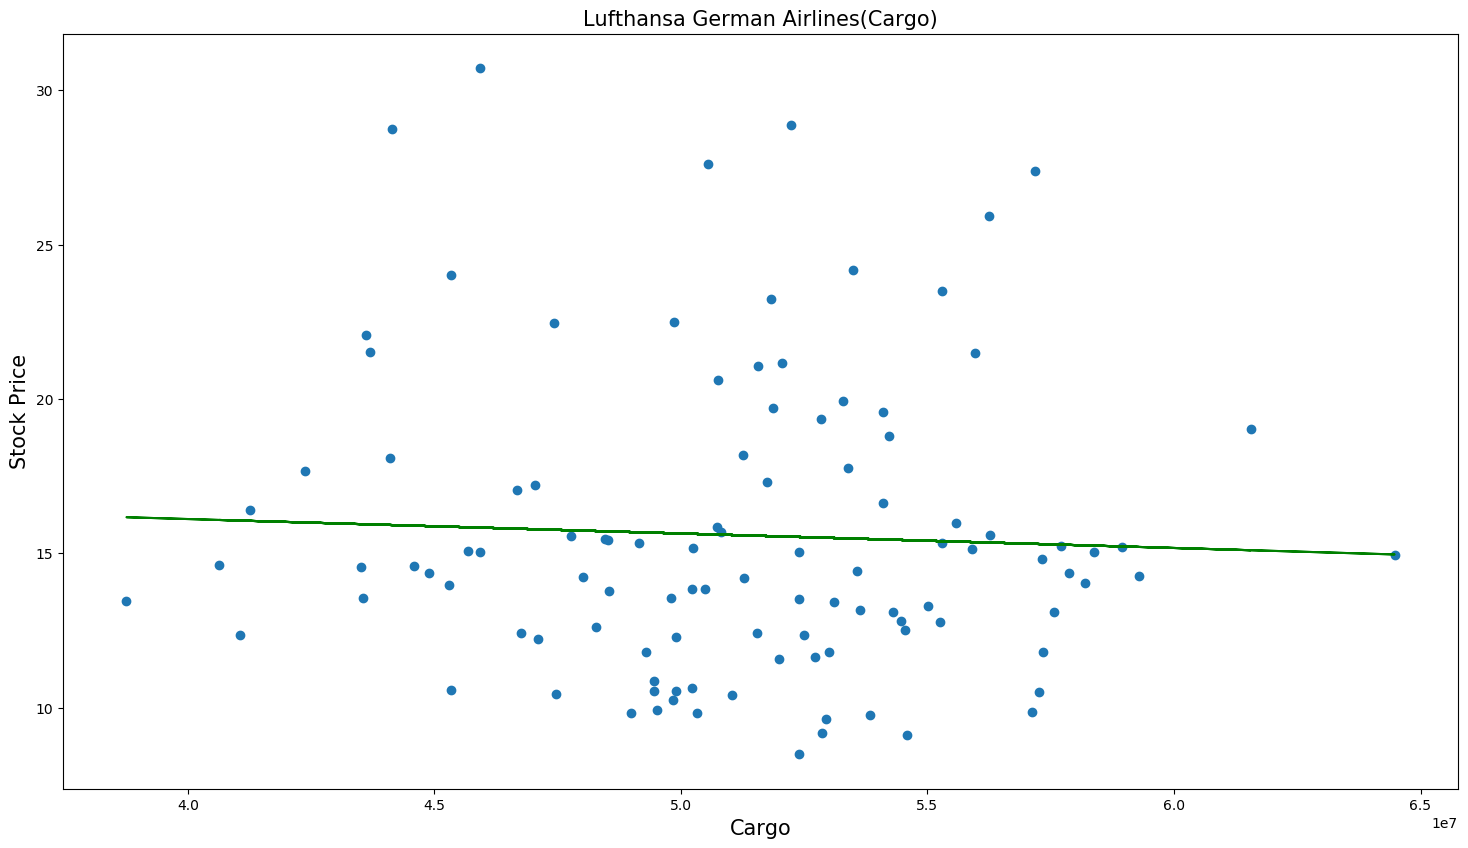

In [28]:
what = 'Freight'
y_value = stockdata['Price'].values[0:189]
x_value = table_Deltaair[dt_between].loc[::-1][what].values[0:189]
line = LinearRegression()
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('{}(Cargo)'.format(company), fontsize = 15)
plt.xlabel('Cargo', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [29]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2340
Date:                Mon, 21 Dec 2020   Prob (F-statistic):              0.630
Time:                        14:15:53   Log-Likelihood:                -321.96
No. Observations:                 108   AIC:                             647.9
Df Residuals:                     106   BIC:                             653.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9826      4.973      3.616      0.000       8.123      27.843
x1         -4.687e-08   9.69e-08     -0.484      0.630   -2.39e-07    1.45e-07
==============================================================================
Omnibus:                       20.352   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.791
Skew:                           1.099   Prob(JB):                     4.14e-06
Kurtosis:                       3.824   Cond. No.                     5.51e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

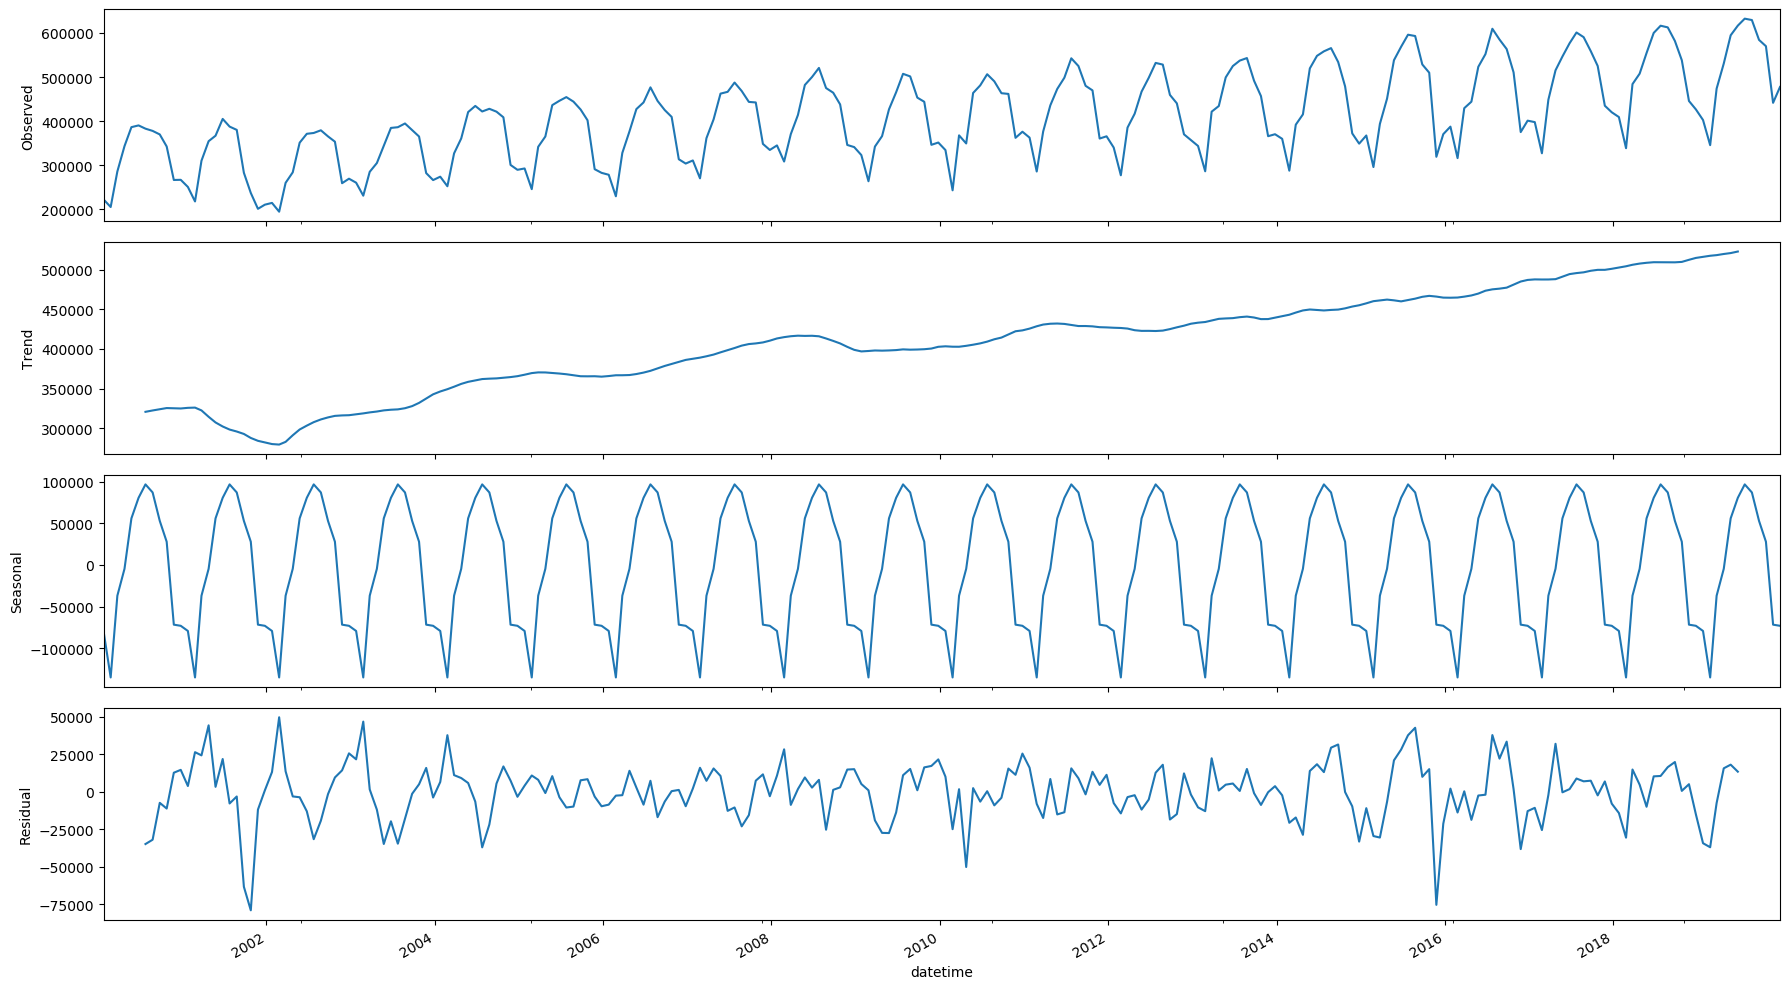

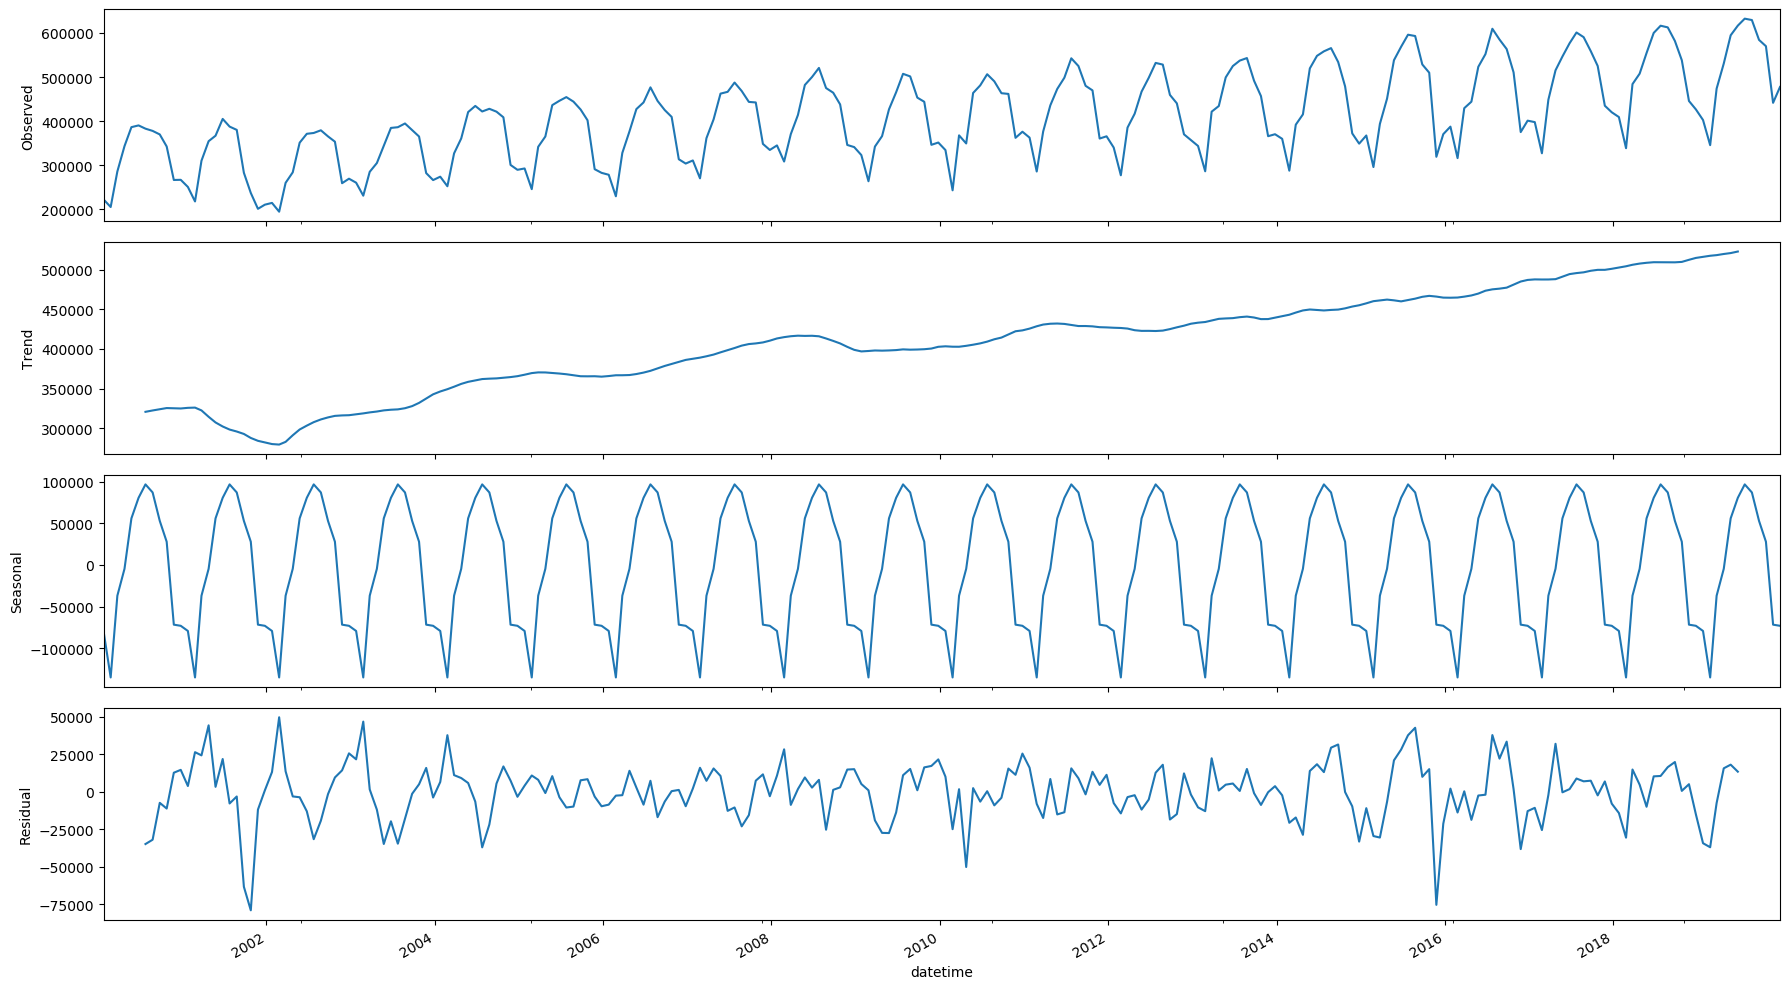

In [30]:
what = 'Passenger'
temp = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['datetime'],columns = [what])
ts_Deltaair = temp[temp[what] !=0]
rcParams['figure.figsize'] = 18, 10
rcParams['figure.dpi'] = 100
decomposition = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12)
decomposition.plot()

In [31]:
temp = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12).trend
table_trend = temp[temp[what].notnull()]
newdate = []
for i in range(len(stockdata['Date'])):
    date = ''
    for j in range(len(stockdata['Date'][i].split())):
        if j == 2:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')
        else:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')+'-'
    newdate.append(date)
stockdata['newdate'] = newdate
datetime = []
for i in range(len(stockdata['Date'])):
    datetime.append(pd.to_datetime(stockdata['newdate'][i], format='%Y-%m-%d'))
stockdata['datetime'] = datetime
stockdata.head()
price = []
date = []
for i in range(len(table_trend)):
    if stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].size != 0:
        price.append(stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].values)          
        date.append(table_trend.index[i])
chart_info = pd.DataFrame(price, index = date, columns = ['Price'])
chart_info[what] = table_trend[what]
chart_info.to_excel(excel_writer=r'C:\Users\com\[MSB535]\data\Breau Data\{} {}.xlsx'.format(company,what))

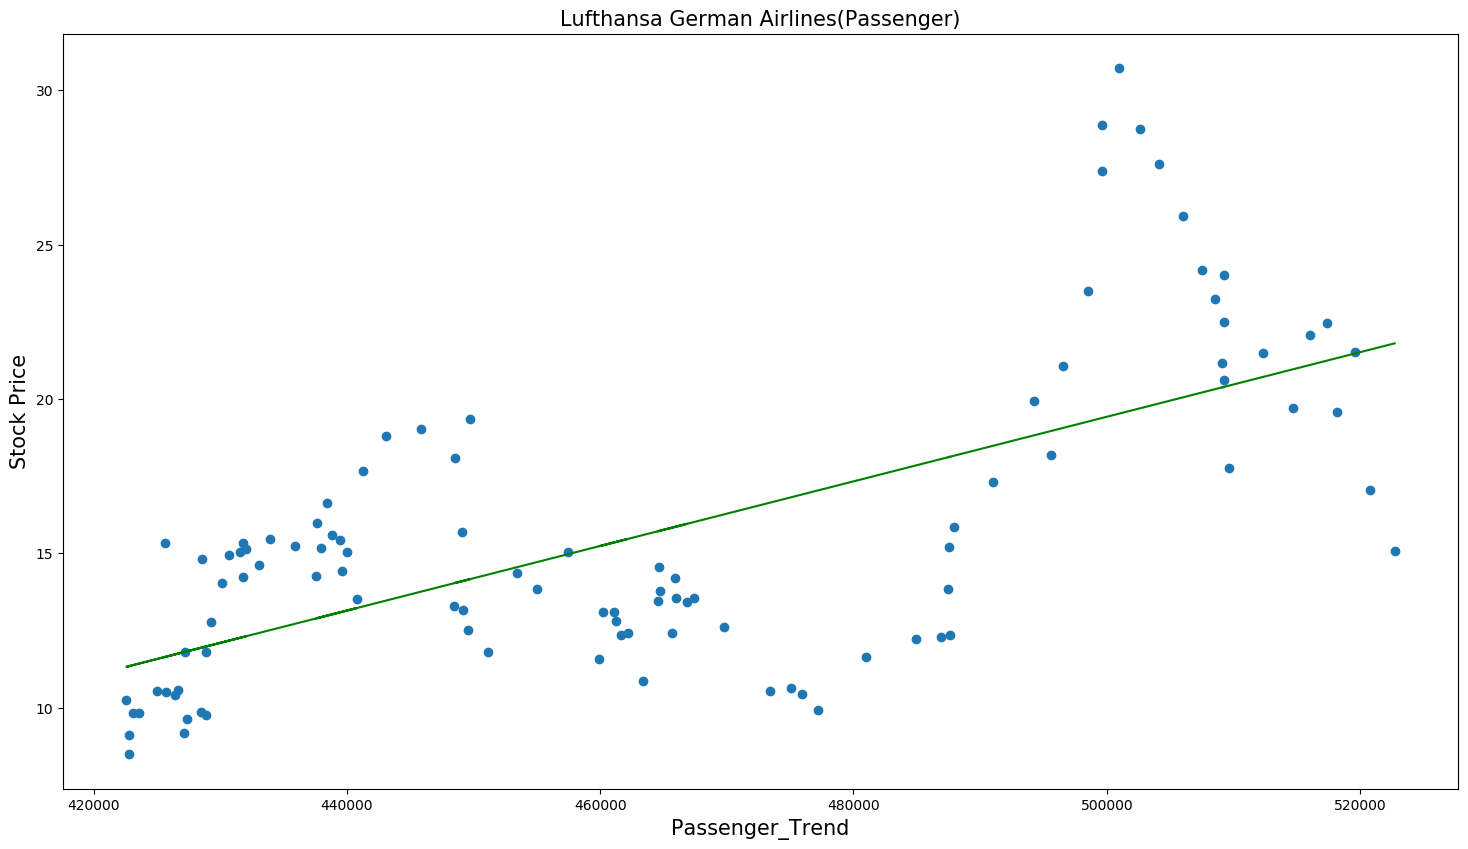

In [32]:
line = LinearRegression()
y_value = chart_info['Price'][0:195]
x_value = chart_info[what].values[0:195]
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('{}(Passenger)'.format(company), fontsize = 15)
plt.xlabel('{}_Trend'.format(what), fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [33]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     78.83
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           2.83e-14
Time:                        14:16:02   Log-Likelihood:                -277.28
No. Observations:                 102   AIC:                             558.6
Df Residuals:                     100   BIC:                             563.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.8967      5.475     -6.009      0.000     -43.758     -22.035
x1             0.0001   1.18e-05      8.878      0.000    8.13e-05       0.000
==============================================================================
Omnibus:                        4.959   Durbin-Watson:                   0.180
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.375
Skew:                           0.487   Prob(JB):                        0.112
Kurtosis:                       3.283   Cond. No.                     6.93e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
dt_min = table_Deltaair['Date'] >= stockdata.tail(1)['Date'].values[0]
dt_max = table_Deltaair['Date'] <= stockdata.head(1)['Date'].values[0]
dt_between = dt_min & dt_max

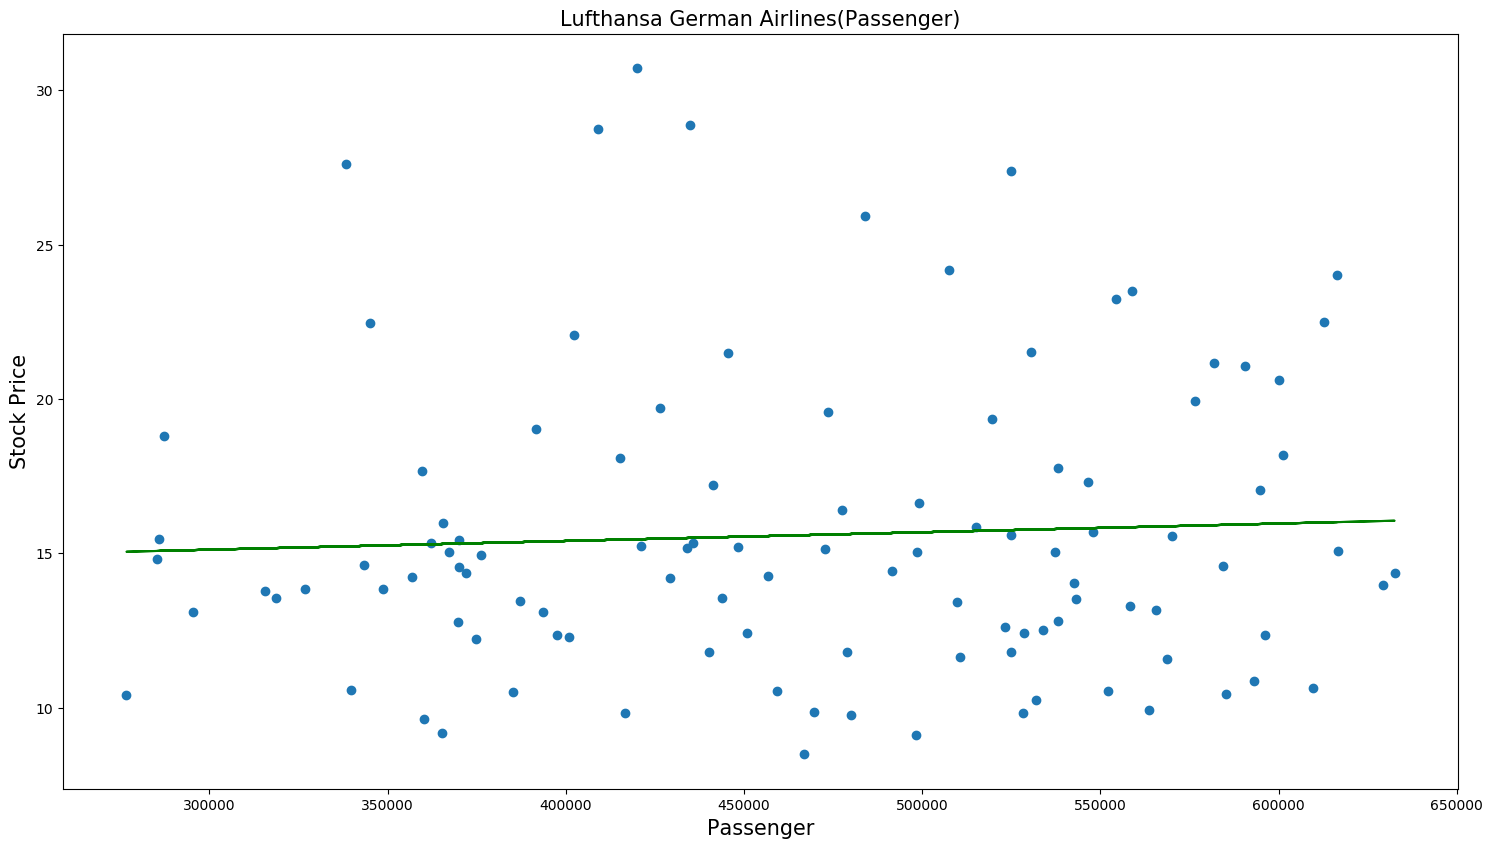

In [35]:
what = 'Passenger'
y_value = stockdata['Price'].values[0:189]
x_value = table_Deltaair[dt_between].loc[::-1][what].values[0:189]
line = LinearRegression()
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('{}(Passenger)'.format(company), fontsize = 15)
plt.xlabel('{}'.format(what), fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [36]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.3264
Date:                Mon, 21 Dec 2020   Prob (F-statistic):              0.569
Time:                        14:16:07   Log-Likelihood:                -321.91
No. Observations:                 108   AIC:                             647.8
Df Residuals:                     106   BIC:                             653.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2680      2.355      6.059      0.000       9.599      18.937
x1          2.823e-06   4.94e-06      0.571      0.569   -6.97e-06    1.26e-05
==============================================================================
Omnibus:                       21.218   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.282
Skew:                           1.111   Prob(JB):                     1.96e-06
Kurtosis:                       3.952   Cond. No.                     2.42e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
chart_info

NameError: name 'chart_info' is not defined